### Trying to create a basic map of the watershed with the monitoring sites and the injection wells

#### Shapefiles were shared by Dr. Chris Spiese (Northern Ohio University)

 - We have shapefiles for the study watersheds (Big Walnut and Alum Creeks).
 - We also have a Columbus SWPZ shapefile, I'm not exactly sure what that is...
 - We have a shapefile with Class II injection wells and volumes, with lots of other metadata. Last updated 2019, I think, and it's for all of Ohio.
 
 - I moved these three directories to this notebook directory.

#### I'll use the GeoPandas package. See my initial attemps with test data from the US Fish and Wildlife service and a [tutorial from Juliet Cohen's blog](https://julietcohen.github.io/posts/2021-11-01-plotting-shapefiles-in-python/) in my test_scenario_usfw notebook.

#### Will overlay polygons from shapefiles into a Google basemap using the [contextily](https://pypi.org/project/contextily/) package. 

In [1]:
import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt # plot our data and manipulate the plot
import contextily as ctx # add a default basemap under our polygons of interest

## Mapping Big Walnut and Alum Creeks and their injection wells:

- Using the same methods of reading in shapefiles, setting a CRS (coordinate reference system), and calling in a baseplot with the same CRS that I detailed in the practive notebook (geopandas_test_scenario_usfw.ipynb), now I move onto our watersheds of interest and associated water quality data.

In [2]:
# Read in the shapefile of watershed polygons
bwc = gpd.read_file('Target Watersheds/alum_and_walnut_targets.shp')

# Take a look at the first rows:
print(bwc.head())  

# Ask python how many rows and columns are in this dataframe
print(bwc.shape)

                                    tnmid  \
0  {C722AC7E-04C2-4C4A-A2B6-F49798570E7D}   
1  {A37D2148-5C74-45BA-A078-7CE22425408E}   
2  {8B4AD19A-6BE9-4800-AD73-86B6E83D2746}   
3  {010BB8E7-3FF4-4B41-9650-75B775CC32D1}   

                               metasource sourcedata sourceorig sourcefeat  \
0                                    None       None       None       None   
1                                    None       None       None       None   
2  {D11180F3-8C6F-4608-8693-B82F27197695}       None       None       None   
3                                    None       None       None       None   

     loaddate  noncontrib  noncontr_1  areasqkm  areaacres referenceg  \
0  2013-01-18         0.0         0.0     76.32   18859.81       None   
1  2013-01-18         0.0         0.0     92.05   22744.93       None   
2  2017-09-12         0.0         0.0     85.01   21005.91       None   
3  2013-01-18         0.0         0.0    143.29   35407.07       None   

                 

In [3]:
bwc

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,areaacres,referenceg,name,states,huc12,hutype,humod,tohuc,layer,path,geometry
0,{C722AC7E-04C2-4C4A-A2B6-F49798570E7D},None,None,None,None,2013-01-18,0.0,0.0,76.32,18859.81,None,West Branch Alum Creek,OH,050600011401,S,TF,050600011402,wbdhu12_a_05060001,C:/Users/c-spiese.1/Desktop/Research Projects/...,"POLYGON ((-82.84664 40.48735, -82.84679 40.487..."
1,{A37D2148-5C74-45BA-A078-7CE22425408E},None,None,None,None,2013-01-18,0.0,0.0,92.05,22744.93,None,Headwaters Alum Creek,OH,050600011402,S,TF,050600011403,wbdhu12_a_05060001,C:/Users/c-spiese.1/Desktop/Research Projects/...,"POLYGON ((-82.80938 40.53569, -82.80963 40.535..."
2,{8B4AD19A-6BE9-4800-AD73-86B6E83D2746},{D11180F3-8C6F-4608-8693-B82F27197695},None,None,None,2017-09-12,0.0,0.0,85.01,21005.91,None,Little Walnut Creek,OH,050600011305,S,"RS,TF",050600011306,wbdhu12_a_05060001,C:/Users/c-spiese.1/Desktop/Research Projects/...,"POLYGON ((-82.82247 40.35048, -82.82235 40.350..."
3,{010BB8E7-3FF4-4B41-9650-75B775CC32D1},None,None,None,None,2013-01-18,0.0,0.0,143.29,35407.07,None,Headwaters Big Walnut Creek,OH,050600011302,S,TF,050600011304,wbdhu12_a_05060001,C:/Users/c-spiese.1/Desktop/Research Projects/...,"POLYGON ((-82.78212 40.52070, -82.78222 40.520..."


In [4]:
# Set the CRS for the geometry of the watershed polygons
bwc_3857 = bwc.to_crs(epsg=3857)
print(bwc_3857.crs)

epsg:3857


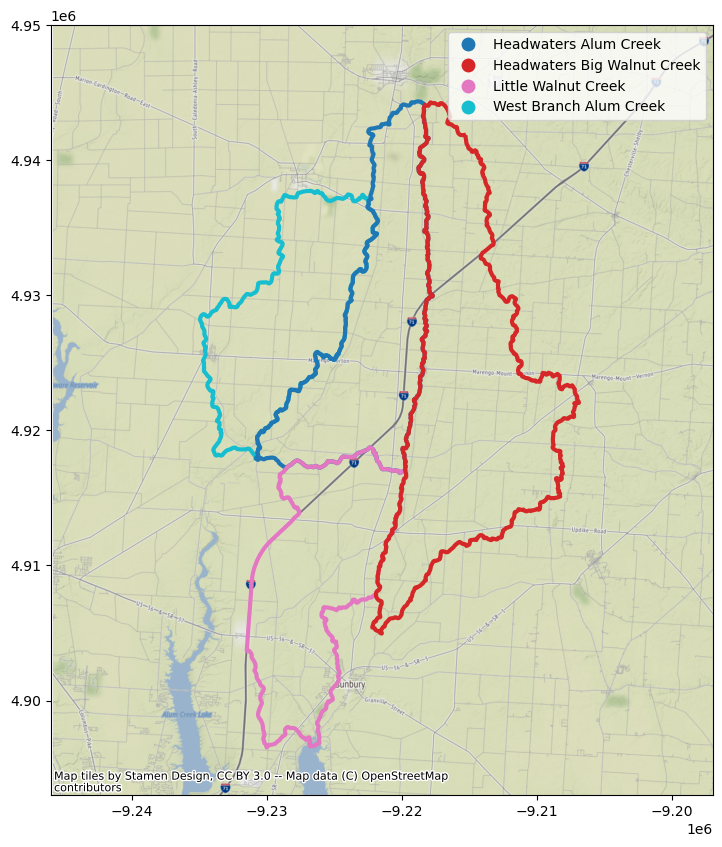

In [5]:
# Plotting the watersheds on top of the GoogleMaps basemap

alum_walnut_polys = bwc_3857.plot(column='name', facecolor="none", 
                                  legend=True, linewidth=3,
             figsize=(10,10))
ctx.add_basemap(alum_walnut_polys) # add in the basemap

# Set the axis limits to zoom in on just the lower 48 states, rather than viewing the entire world:  
plt.ylim([4893000,4950000])
plt.xlim([-9246000,-9197000]);

In [6]:
# Now read in the injection well shapefiles

# Read in the shapefile of injection well points
inj = gpd.read_file('OH_ClassII_Loc_Vols_10_Q4_2019_WithExcel/OH_ClassII_Loc_Vols_10_Q4_2019.shp')

# Take a look at the first rows:
print(inj.head())  

# Ask python how many rows and columns are in this dataframe
print(inj.shape)

            API         API10                   CompanyNam  County   Latitude  \
0  3.410000e+13  3.405321e+09           Pillar Energy, LLC  GALLIA  38.698413   
1  3.410000e+13  3.405321e+09          Huffman-Bowers Inc.  GALLIA  38.914121   
2  3.410000e+13  3.410524e+09  Roscoe Mills Injection Well   MEIGS  38.933000   
3  3.410000e+13  3.410524e+09  Roscoe Mills Injection Well   MEIGS  38.940603   
4  3.410000e+13  3.410524e+09           Murphy Oil Company   MEIGS  38.964721   

   Longitude                   Owner OwnerName2 PermitDate Township  ...  \
0 -82.428666       PILLAR ENERGY LLC          .          .   WALNUT  ...   
1 -82.155023      HUFFMAN-BOWERS INC          .          .  ADDISON  ...   
2 -81.788496   ROSCOE MILLS JR TRUST          .          .  LEBANON  ...   
3 -81.787562   ROSCOE MILLS JR TRUST          .          .  LEBANON  ...   
4 -81.785689  FQ ENERGY SERVICES LLC          .          .  LEBANON  ...   

  Vol_InD_36 Vol_Out_36 AltName_57                   Com

In [7]:
inj

,API,API10,CompanyNam,County,Latitude,Longitude,Owner,OwnerName2,PermitDate,Township,...,Vol_InD_36,Vol_Out_36,AltName_57,Company_38,Vol_InD_37,Vol_Out_37,Total_In,Total_Out,Total,geometry
0,3.410000e+13,3.405321e+09,"Pillar Energy, LLC",GALLIA,38.698413,-82.428666,PILLAR ENERGY LLC,.,.,WALNUT,...,0,0,.,"Pillar Energy, LLC",0,0,0,0,0,POINT (-82.42867 38.69841)
1,3.410000e+13,3.405321e+09,Huffman-Bowers Inc.,GALLIA,38.914121,-82.155023,HUFFMAN-BOWERS INC,.,.,ADDISON,...,0,0,.,Huffman-Bowers Inc.,0,0,51280,1121251,1172531,POINT (-82.15502 38.91412)
2,3.410000e+13,3.410524e+09,Roscoe Mills Injection Well,MEIGS,38.933000,-81.788496,ROSCOE MILLS JR TRUST,.,.,LEBANON,...,0,0,.,Roscoe Mills Injection Well,0,0,54476,1465949,1520425,POINT (-81.78850 38.93300)
3,3.410000e+13,3.410524e+09,Roscoe Mills Injection Well,MEIGS,38.940603,-81.787562,ROSCOE MILLS JR TRUST,.,.,LEBANON,...,0,0,.,Roscoe Mills Injection Well,0,0,361338,4324116,4685454,POINT (-81.78756 38.94060)
4,3.410000e+13,3.410524e+09,Murphy Oil Company,MEIGS,38.964721,-81.785689,FQ ENERGY SERVICES LLC,.,.,LEBANON,...,0,0,.,Murphy Oil Company,0,0,32524,745087,777611,POINT (-81.78569 38.96472)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.000000e+00,3.402592e+10,Buckshot Disposal,.,0.000000,0.000000,.,.,.,.,...,0,0,.,Buckshot Disposal,0,0,0,0,0,POINT (-17976931348623157081452742373170435679...
239,0.000000e+00,3.415525e+09,M & R Investments,.,0.000000,0.000000,.,.,.,.,...,0,0,.,M & R Investments,0,0,27215,0,27215,POINT (-17976931348623157081452742373170435679...
240,0.000000e+00,0.000000e+00,"Hunter Disposal, LLC",.,0.000000,0.000000,.,.,.,.,...,0,0,.,.,0,0,320740,2874784,3195524,POINT (-17976931348623157081452742373170435679...
241,0.000000e+00,0.000000e+00,"EnerVest Operating, LLC",.,0.000000,0.000000,.,.,.,.,...,0,0,.,.,0,0,15950,0,15950,POINT (-17976931348623157081452742373170435679...


In [8]:
# Set the CRS for the geometry of the injection well points
inj_3857 = inj.to_crs(epsg=3857)
print(inj_3857.crs)

epsg:3857


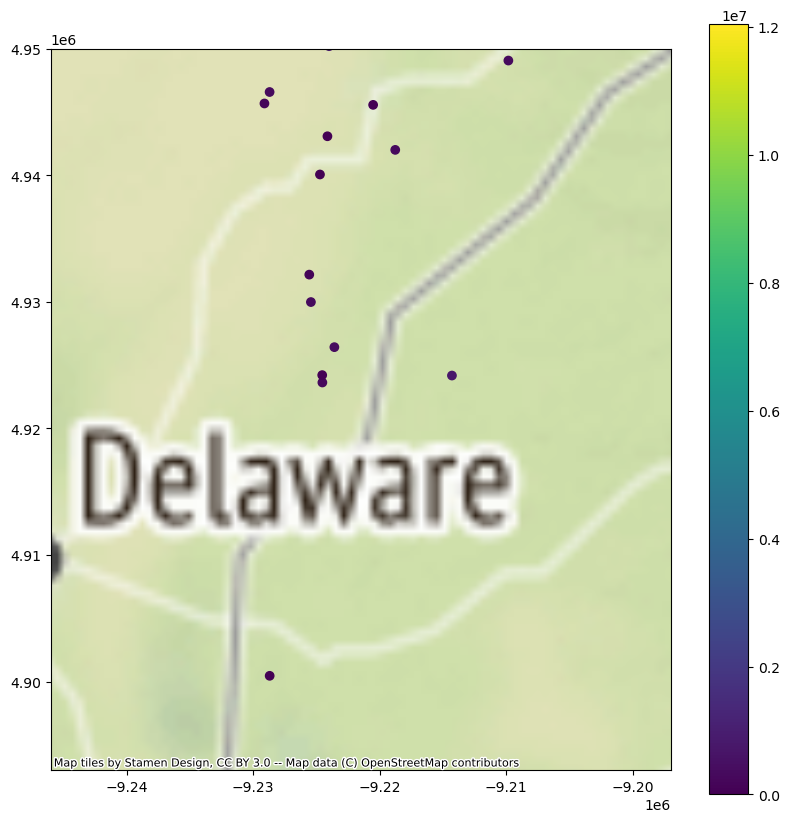

In [9]:
# Plotting the watersheds on top of the GoogleMaps basemap

alum_walnut_wells = inj_3857.plot(column='Total', 
                                  legend=True, 
             figsize=(10,10))
ctx.add_basemap(alum_walnut_wells) # add in the basemap

# Set the axis limits to zoom in on just the lower 48 states, rather than viewing the entire world:  
plt.ylim([4893000,4950000])
plt.xlim([-9246000,-9197000]);

### Also reading in the greater Columbus/Scioto River polygon

In [10]:
# Now read in the Columbus shapefile

# Read in the shapefile of the upper Scioto
col = gpd.read_file('Columbus/Columbus_SWPZ.shp')

# Take a look at the first rows:
print(col.head())  

# Ask python how many rows and columns are in this dataframe
print(col.shape)

                                    tnmid  \
0  {968AC3FE-5824-4461-9449-2CCA999FFB43}   

                               metasource sourcedata sourceorig sourcefeat  \
0  {D11180F3-8C6F-4608-8693-B82F27197695}       None       None       None   

     loaddate  noncontrib  noncontr_1  areasqkm  areaacres referenceg  \
0  2017-09-12         0.0         0.0    123.04   30403.45       None   

                             name states         huc12 hutype humod  \
0  Headwaters Little Scioto River     OH  050600010302      S    TF   

          tohuc                                           geometry  
0  050600010303  MULTIPOLYGON (((-83.06328 40.02433, -83.06267 ...  
(1, 18)


In [11]:
col

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,areaacres,referenceg,name,states,huc12,hutype,humod,tohuc,geometry
0,{968AC3FE-5824-4461-9449-2CCA999FFB43},{D11180F3-8C6F-4608-8693-B82F27197695},None,None,None,2017-09-12,0.0,0.0,123.04,30403.45,None,Headwaters Little Scioto River,OH,050600010302,S,TF,050600010303,"MULTIPOLYGON (((-83.06328 40.02433, -83.06267 ..."


In [12]:
# Set the CRS for the geometry of the Scioto polygon
col_3857 = col.to_crs(epsg=3857)
print(inj_3857.crs)

epsg:3857


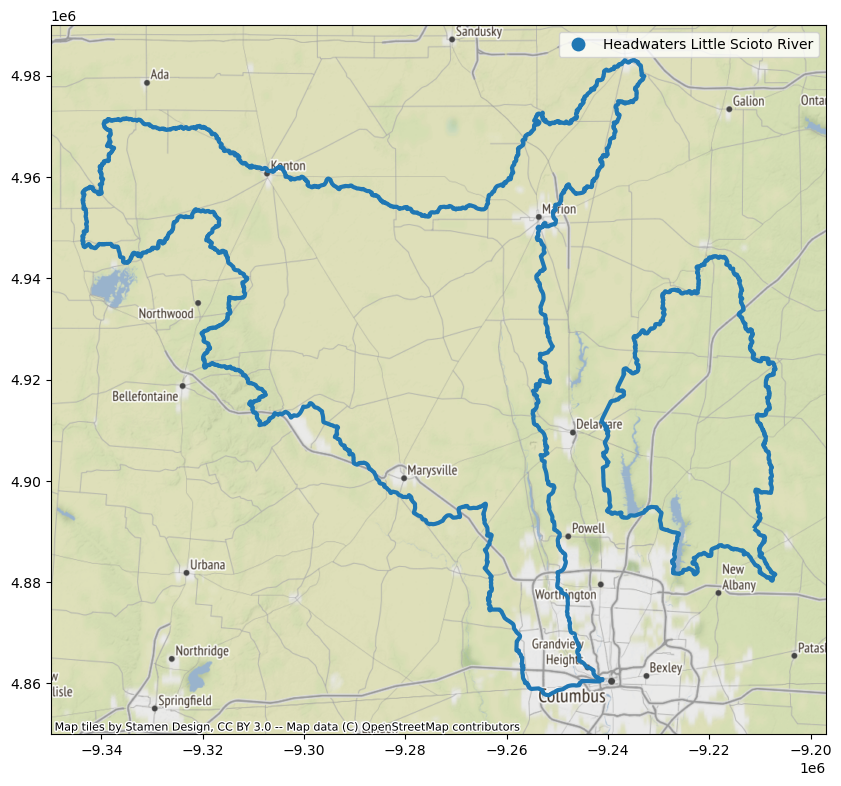

In [13]:
# Plotting the Scioto watershed polygon on top of the GoogleMaps basemap

columbus_polys = col_3857.plot(column='name', facecolor="none", 
                                  legend=True, linewidth=3,
             figsize=(10,10))
ctx.add_basemap(columbus_polys) # add in the basemap

# Set the axis limits to zoom in on just the lower 48 states, rather than viewing the entire world:  
plt.ylim([4850000,4990000])
plt.xlim([-9350000,-9197000]);

### Combining maps:

#### Importantly, we need to have the same CRS for each separate map before combining, so they align. We should be good here. I know there is a simpler way to do this layering in GeoPandas (detailed [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html), but I'm going to use matplotlib objects.

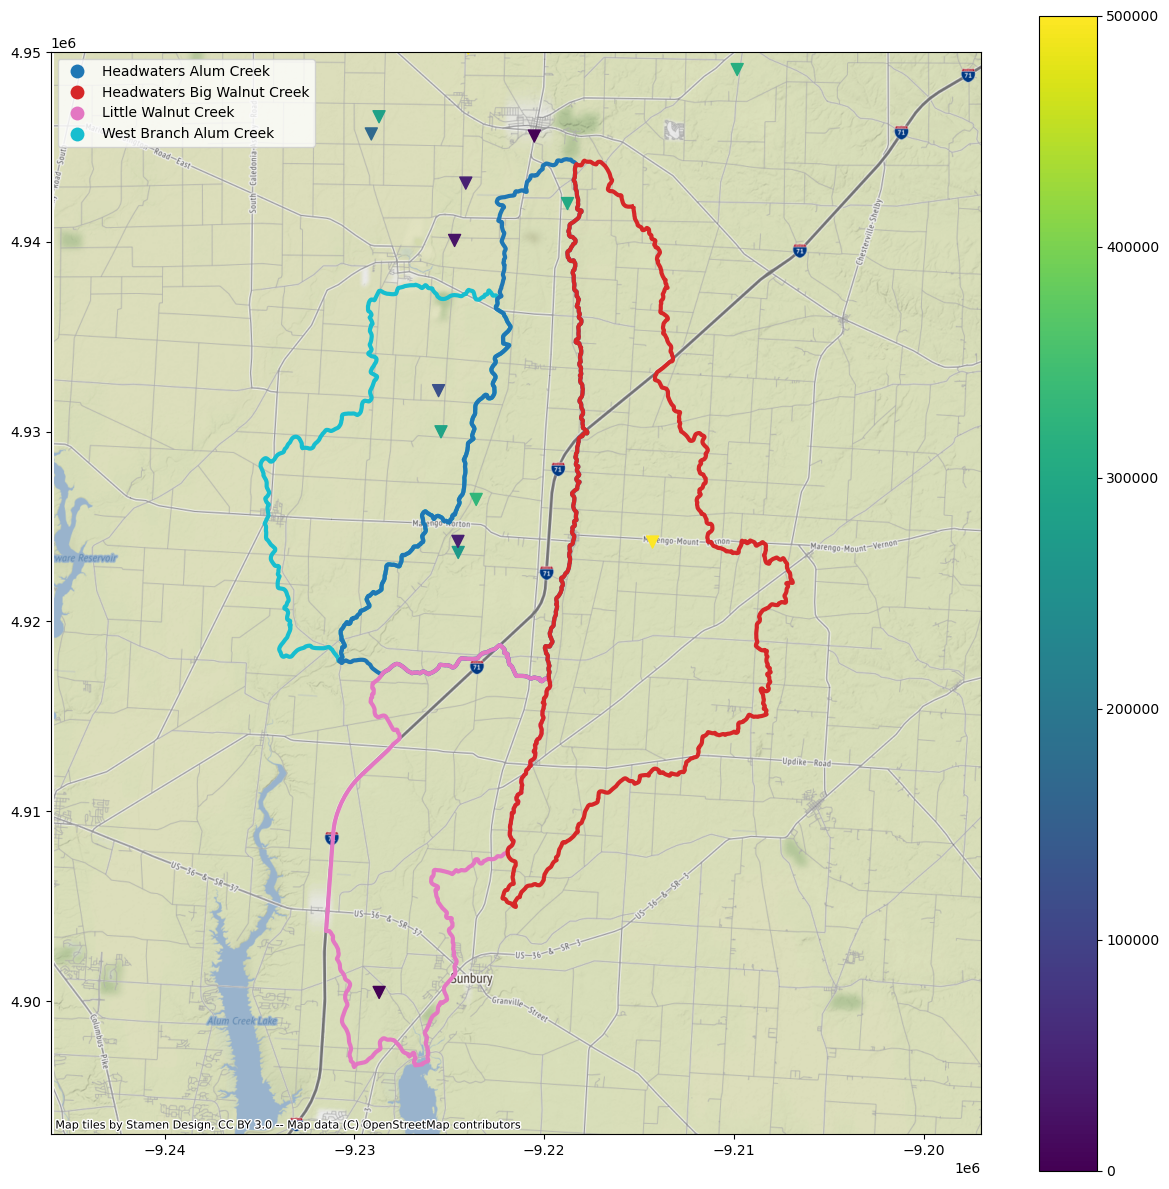

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

# Watershed polygons
alum_walnut_polys = bwc_3857.plot(ax = ax, column='name', facecolor="none", legend=True, linewidth=3) 

ctx.add_basemap(alum_walnut_polys) # add in the basemap

# Ohio Class II injection wells and volumes as of 2019              
alum_walnut_wells = inj_3857.plot(ax = ax, marker = 'v', markersize = 75, column='Total', 
                                  vmin=0, vmax=500000, legend=True)

# Scioto River headwaters polygon
#col_3857.plot(ax = ax, column='name', facecolor="none", linewidth=3)


# Set the axis limits to zoom in on just the lower 48 states, rather than viewing the entire world:  
plt.ylim([4893000,4950000])
plt.xlim([-9246000,-9197000]);